# Importing modules

In [1]:
import mysql.connector
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt

# Directory path containing csv Files

In [2]:
os.chdir(r'C:\Users\user\Desktop\data_for_project')

In [3]:
# CREDENTIALS
myhost = "localhost"
myuser = "root"
mypassword = "123456"
mydatabase = "Employee"

# ESTABLISHING DATABASE CONNECTION

In [4]:
try:
    conn = mysql.connector.connect(host=myhost, user=myuser, password=mypassword, database=mydatabase)
    print("Connection successful...")
except:
    print("Connection failed!")

Connection successful...


# CREATING TABLE IF NOT EXIST ALREADY

In [12]:
try:
    cursor = conn.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS EmpData (
        id integer NOT NULL PRIMARY KEY,
        first_name  VARCHAR(255) NOT NULL,
        last_name  VARCHAR(255) NOT NULL,
        email  VARCHAR(255) NOT NULL,
        department  VARCHAR(255) NOT NULL,
        phone_number  VARCHAR(50) NOT NULL,
        city VARCHAR(255)  NOT NULL ) ''')
    print("Table created successfully!")
except:
    print("Table creation failed!")

Table created successfully!


# INSERTING ROWS IN TABLE

In [13]:
for file in os.listdir():
    if file.endswith('.csv'):
        with open(file, encoding="utf8") as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            header = next(csv_reader)
            for row in csv_reader:
                cursor.execute('''INSERT INTO EmpData (id, first_name, last_name, email, department, phone_number, city)
                                   VALUES (%s, %s, %s, %s, %s, %s, %s)''', row)
        conn.commit()
        print(f"{file} loaded successfully!")

MOCK_DATA (1).csv loaded successfully!
MOCK_DATA (2).csv loaded successfully!
MOCK_DATA (3).csv loaded successfully!
MOCK_DATA (4).csv loaded successfully!
MOCK_DATA.csv loaded successfully!


# Results

In [7]:
df = pd.read_sql("SELECT * FROM empdata ORDER BY id", conn)

C:\Users\user\AppData\Local\Temp\ipykernel_11752\2925720555.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM empdata ORDER BY id", conn)


In [8]:
df

,id,first_name,last_name,email,department,phone_number,city
0,1,Lorrie,Mackriell,lmackriell0@nationalgeographic.com,Training,819-912-7703,Hamanoichi
1,2,Bertie,Marson,bmarson1@usatoday.com,Training,476-109-0452,Xinyuan
2,3,Chev,Atkinson,catkinson2@wikia.com,Product Management,646-993-8104,Devesa
3,4,Janith,Marston,jmarston3@google.nl,Human Resources,932-744-9396,Fu’an
4,5,Dorothee,Lill,dlill4@paginegialle.it,Human Resources,920-326-1926,Valinhos
...,...,...,...,...,...,...,...
4995,4996,Jo,MacCracken,jmaccrackenrn@seesaa.net,Training,951-787-5542,Vila de Sal Rei
4996,4997,Silvana,Dalyell,sdalyellro@drupal.org,Support,800-251-0248,Bromma
4997,4998,Alis,Garrould,agarrouldrp@free.fr,Business Development,974-794-6963,Ajoyani
4998,4999,Dimitry,Finnis,dfinnisrq@pbs.org,Training,835-115-0563,Krasnyy Profintern


In [7]:
# Number of employees in each department
df2 = pd.read_sql("select department, count(*) as Total_Employees from empdata group by 1", conn)

C:\Users\user\AppData\Local\Temp\ipykernel_4212\4180000738.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql("select department, count(*) as Total_Employees from empdata group by 1", conn)


In [8]:
df2

,department,Total_Employees
0,Training,392
1,Product Management,444
2,Human Resources,421
3,Marketing,391
4,Research and Development,445
5,Services,412
6,Business Development,429
7,Engineering,415
8,Sales,432
9,Legal,405


# Pivoting/Transforming table to different department containing names and id of Employees

In [10]:
query = '''with cte as (
select id,case when department = 'Support' then concat(first_name," ","(",id,")") end as Support,
case when department = 'Training' then concat(first_name," ","(",id,")") end as Training,
case when department = 'Business Development' then concat(first_name," ","(",id,")") end as Business_Development,
case when department = 'Services' then concat(first_name," ","(",id,")") end as Services,
case when department = 'Marketing' then concat(first_name," ","(",id,")") end as Marketing,
case when department = 'Product Management' then concat(first_name," ","(",id,")") end as Product_Management,
case when department = 'Human Resources' then concat(first_name," ","(",id,")") end as Human_resources,
case when department = 'Research and Development' then concat(first_name," ","(",id,")") end as ResearchNDevelopment,
case when department = 'Accounting' then concat(first_name," ","(",id,")") end as Accounting,
case when department = 'Legal' then concat(first_name," ","(",id,")") end as Legal,
case when department = 'Engineering' then concat(first_name," ","(",id,")") end as Engineering,
case when department = 'Sales' then concat(first_name," ","(",id,")") end as Sales
from employee.empdata limit 5000
),
rd as(
select ResearchNDevelopment, row_number() over (order by id) as ResearchNDevelopmentrn from cte where ResearchNDevelopment is not null 
),
t as (
select Training, row_number() over (order by id) as trainingrn from cte where training is not null ),
sp as (
select support, row_number() over (order by id) as supportrn from cte where support is not null
),
bd as (
select Business_development, row_number() over (order by id) as Business_developmentrn from cte where Business_development is not null
),
srv as (
select services, row_number() over (order by id) as servicesrn from cte where services is not null
),
mrkt as (
select marketing, row_number() over (order by id) as marketingrn from cte where marketing is not null
),
pm as (
select product_management, row_number() over (order by id) as product_managementrn from cte where product_management is not null
),
hr as (
select human_resources, row_number() over (order by id) as human_resourcesrn from cte where human_resources is not null
),
acc as (
select accounting, row_number() over (order by id) as accountingrn from cte where accounting is not null
)



select t.training,sp.support,rd.ResearchNDevelopment,bd.business_development,srv.services, mrkt.marketing, pm.product_management,
hr.human_resources, acc.accounting from rd join t on ResearchNDevelopmentrn = t.trainingrn
join sp on ResearchNDevelopmentrn = sp.supportrn join bd on ResearchNDevelopmentrn = Business_developmentrn
join srv on ResearchNDevelopmentrn = servicesrn join mrkt on ResearchNDevelopmentrn = marketingrn
join pm on ResearchNDevelopmentrn = product_managementrn join hr on ResearchNDevelopmentrn = human_resourcesrn
join acc on ResearchNDevelopmentrn = accountingrn;'''

# Final Result/ Transformed Data

In [11]:
df3 = pd.read_sql(query, conn)

C:\Users\user\AppData\Local\Temp\ipykernel_4212\644181127.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query, conn)


In [12]:
df3

,training,support,ResearchNDevelopment,business_development,services,marketing,product_management,human_resources,accounting
0,Lorrie (1),Deina (23),Farra (8),Jennee (12),Lauren (10),Lavena (6),Chev (3),Janith (4),Davey (18)
1,Bertie (2),Rollo (36),Moss (11),Dagmar (35),Harli (22),Ansley (13),Aimee (7),Dorothee (5),Salvador (34)
2,Aldous (19),Dunstan (46),Jessy (58),Fleming (49),Birdie (27),Northrop (20),Jacquelynn (9),Damien (28),Gayla (40)
3,Hildagard (33),Joey (47),Stanton (64),Chrissie (62),William (42),Saundra (25),Jsandye (16),Juan (30),Ferdie (51)
4,Sybille (53),Terrie (54),Stephan (69),Jayne (75),Alisa (45),Stu (43),Marylee (71),Wyatan (32),Ailis (52)
...,...,...,...,...,...,...,...,...,...
386,Kelsey (4943),Waylan (4722),Marcelle (4339),Mickie (4490),Merissa (4662),Merrielle (4919),Elsa (4313),Guntar (4607),Hyman (4751)
387,Isaac (4946),Nigel (4730),Jean (4343),Lesli (4505),Neil (4673),Nissy (4925),Teodoro (4321),Nealy (4611),Justinn (4757)
388,Cecile (4966),Poul (4766),Lura (4358),Benedict (4529),Clair (4707),Jillian (4975),Eada (4333),Kerrill (4614),Pen (4759)
389,Rose (4985),Natalya (4788),Frederico (4370),Kelsy (4535),Karel (4713),Elspeth (4988),Pincus (4355),Thacher (4617),Edie (4782)


C:\Users\user\AppData\Local\Temp\ipykernel_5832\979053980.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM empdata ORDER BY id", conn)
C:\Users\user\AppData\Local\Temp\ipykernel_5832\979053980.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql("select department, count(*) as Total_Employees from empdata group by 1", conn)


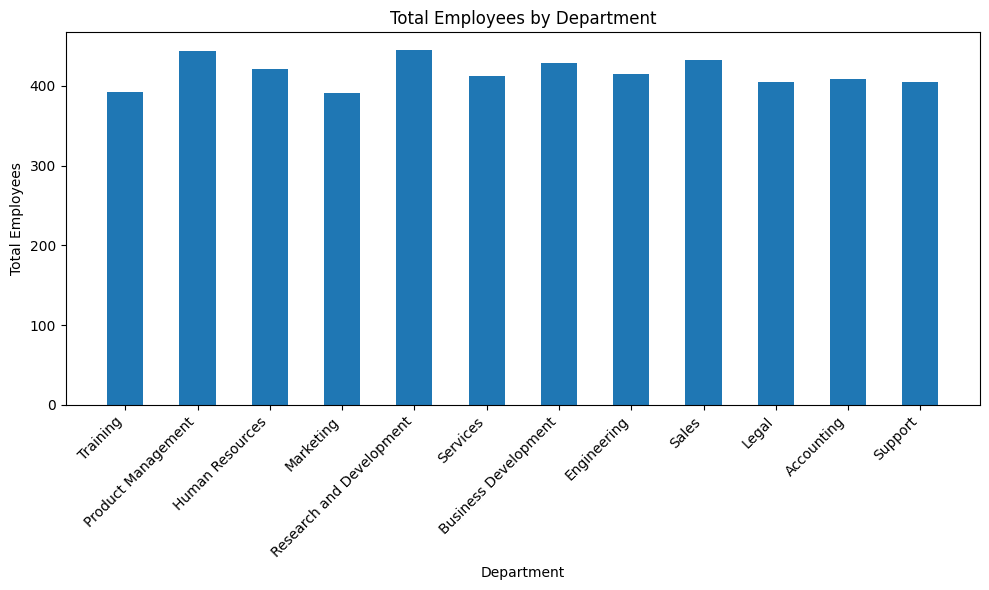

In [10]:

# load data
df = pd.read_sql("SELECT * FROM empdata ORDER BY id", conn)
df2 = pd.read_sql("select department, count(*) as Total_Employees from empdata group by 1", conn)

# create bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df2['department'], df2['Total_Employees'], width=0.5)  # add width parameter to create a gap of 0.5
ax.set_title('Total Employees by Department')
ax.set_xlabel('Department')
ax.set_ylabel('Total Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()